In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



In [2]:
# Step 1: Data Loading and Initial Exploration

health_raw = pd.read_excel('Health_insurance_cost.xlsx')

In [3]:
health_insurance = health_raw.copy()

In [4]:
health_insurance

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3,no,northwest,10600.54830
1334,18.0,female,31.920,0,no,northeast,2205.98080
1335,18.0,female,36.850,0,no,southeast,1629.83350
1336,21.0,female,25.800,0,no,southwest,2007.94500


In [5]:
health_insurance.mean()

<ipython-input-5-b5f46d9499ee>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  health_insurance.mean()


age                          39.166412
BMI                          30.638217
Children                      1.094918
health_insurance_price    13268.527719
dtype: float64

In [6]:
health_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


In [7]:
health_insurance.describe()

,age,BMI,Children,health_insurance_price
count,1310.000000,1315.000000,1338.000000,1336.000000
mean,39.166412,30.638217,1.094918,13268.527719
std,14.055378,6.110302,1.205493,12112.797724
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.210000,0.000000,4744.325050
50%,39.000000,30.305000,1.000000,9382.033000
75%,51.000000,34.580000,2.000000,16604.302645
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
health_insurance.rename(columns= {'smoking_status':'smoker','health_insurance_price' : 'insurance_price','gender':'sex'}, inplace=True)

In [9]:
health_insurance.isna().sum()

age                28
sex                 0
BMI                23
Children            0
smoker              0
location            0
insurance_price     2
dtype: int64

In [10]:
health_insurance.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [12]:
health_insurance.age.unique()

array([19., 18., 28., 33., 32., 31., 46., 37., 60., 25., 62., 23., 56.,
       27., 52., 30., 34., 59., nan, 55., 22., 63., 26., 35., 24., 41.,
       38., 36., 21., 48., 40., 58., 53., 43., 64., 20., 61., 44., 57.,
       29., 45., 54., 49., 47., 51., 42., 50., 39.])

In [13]:
health_insurance.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [14]:
health_insurance.nunique()

age                  47
sex                   2
BMI                 545
Children              6
smoker                2
location              4
insurance_price    1335
dtype: int64

In [ ]:
health_insurance.location.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: location, dtype: int64

In [ ]:
health_insurance.duplicated().sum()

1

In [ ]:
health_insurance[health_insurance.duplicated()]

,age,gender,BMI,Children,smoker,location,insurance_price
581,19.0,male,30.59,0,no,northwest,1639.5631


In [15]:
# Step 2: Handling Missing Values

health_insurance['age'].fillna(health_insurance['age'].mean(), inplace=True)
health_insurance['BMI'].fillna(health_insurance['BMI'].mean(), inplace=True)
health_insurance['insurance_price'].fillna(health_insurance['insurance_price'].mean(), inplace=True)

In [16]:
health_insurance.isna().sum()

age                0
sex                0
BMI                0
Children           0
smoker             0
location           0
insurance_price    0
dtype: int64

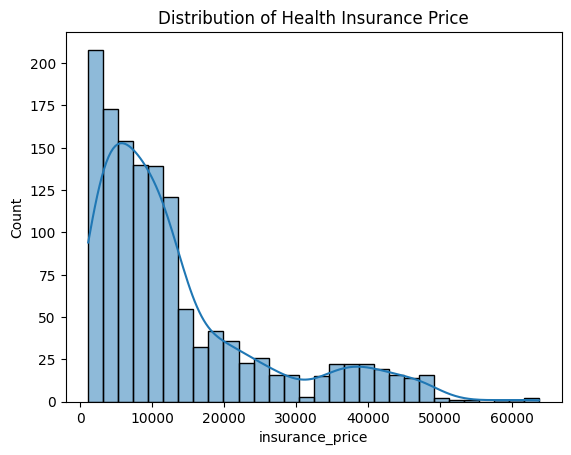

In [17]:
# Step 3: Exploratory Data Analysis (EDA)

sns.histplot(data=health_insurance,x='insurance_price',kde=True)
plt.title('Distribution of Health Insurance Price')
plt.show()

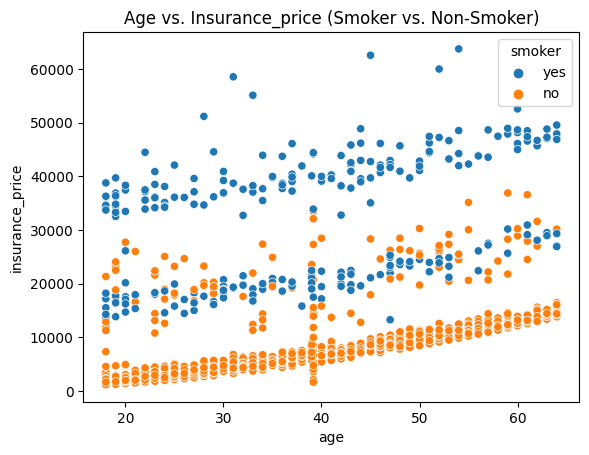

In [ ]:
sns.scatterplot(data=health_insurance, x='age', y='insurance_price', hue='smoker')
plt.title('Age vs. Insurance_price (Smoker vs. Non-Smoker)')
plt.show()


In [ ]:
fig = px.scatter(health_insurance, x="age", y="insurance_price",color = 'smoker', width=800, height=400)

fig.show()

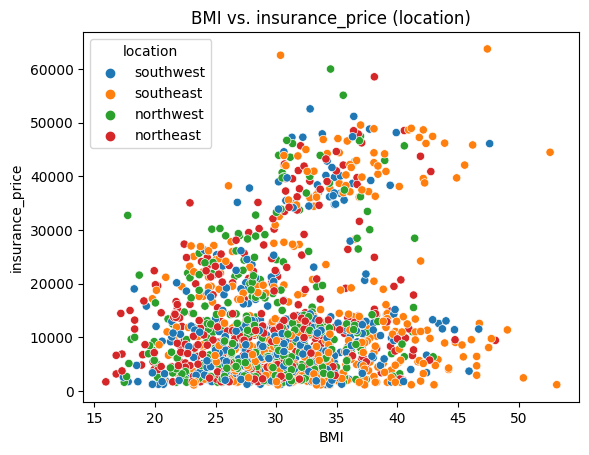

In [ ]:
sns.scatterplot(data=health_insurance, x='BMI', y='insurance_price', hue='location')
plt.title('BMI vs. insurance_price (location)')
plt.show()

In [ ]:
fig = px.scatter(health_insurance, x="BMI", y="insurance_price",color='location')

fig.show()

<Axes: ylabel='Children'>

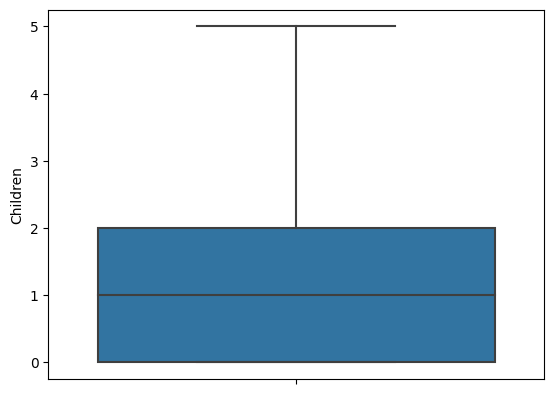

In [ ]:
sns.boxplot( y=health_insurance['Children'] )

In [ ]:
fig = px.box( health_insurance, x="location", y="age", color="location", notched=True, points="all", width=800, height=400,
)
fig.show()

<Axes: >

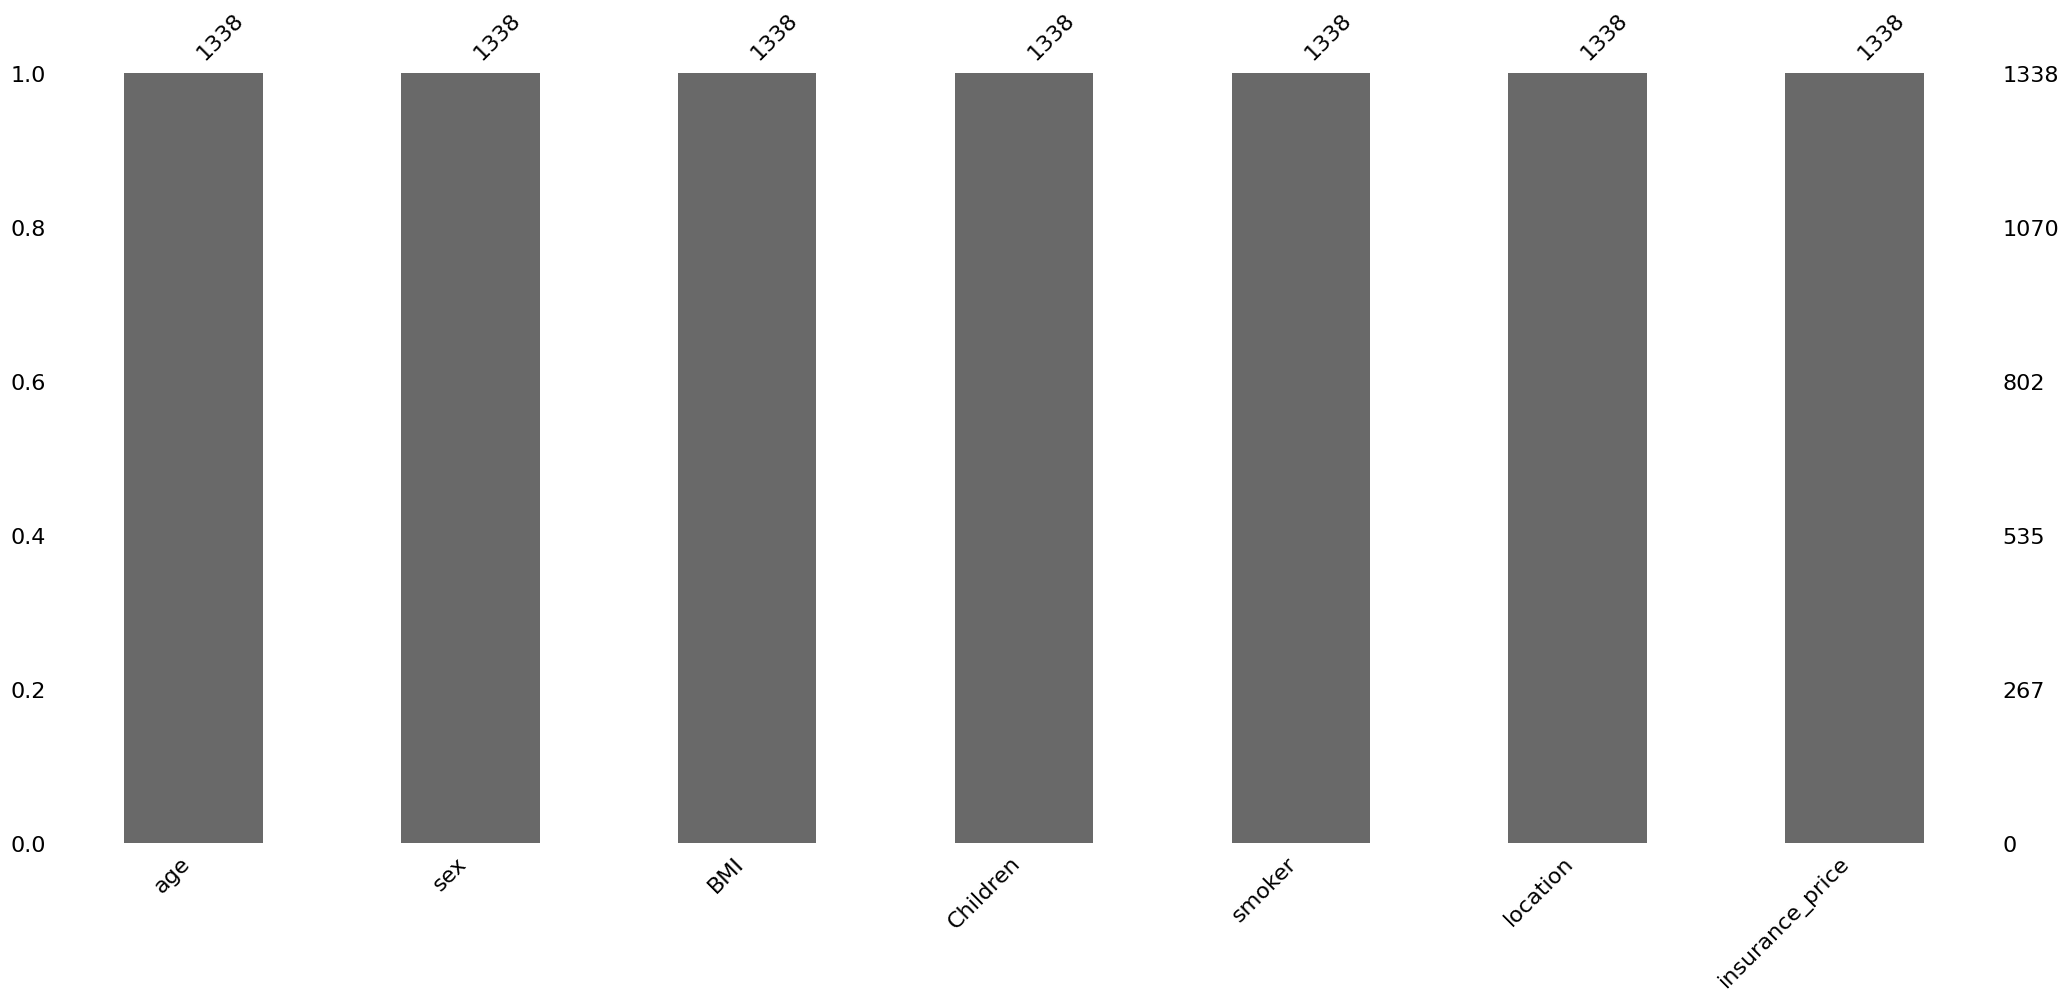

In [ ]:
import missingno as msno
msno.bar( health_insurance )

<Axes: >

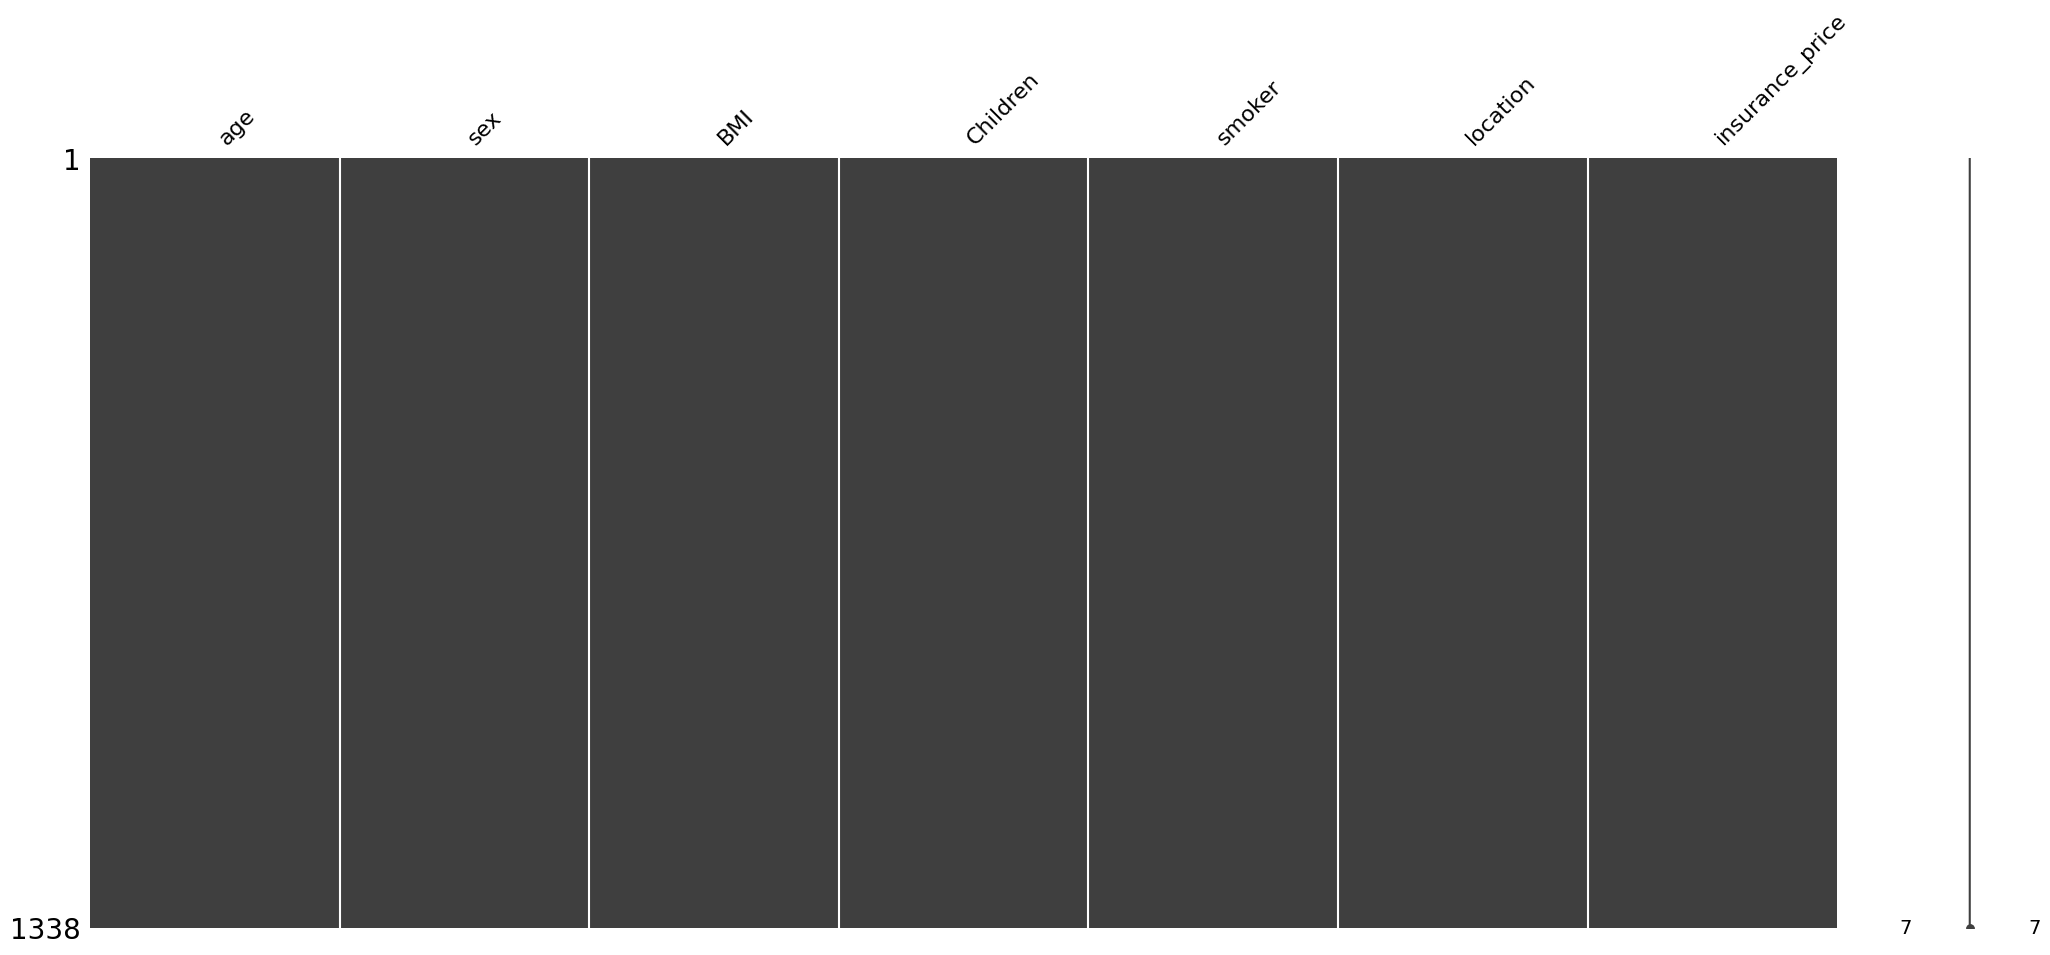

In [ ]:
msno.matrix( health_insurance )

<ipython-input-73-017c52427f1c>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



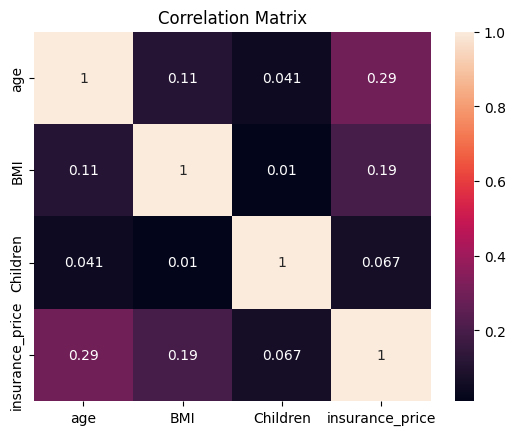

In [ ]:
correlation_matrix = health_insurance.corr()
sns.heatmap( correlation_matrix, annot = True )
plt.title('Correlation Matrix')
plt.show()


In [18]:
# Step 4: Data Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

encoder =LabelEncoder()

health_insurance['sex'] = encoder.fit_transform(health_insurance['sex'])
health_insurance['smoker'] = encoder.fit_transform( health_insurance['smoker'])
health_insurance['location'] = encoder.fit_transform(health_insurance['location'])

print(health_insurance.head())

    age  sex        BMI  Children  smoker  location  insurance_price
0  19.0    0  30.638217         0       1         3      16884.92400
1  18.0    1  33.770000         1       0         2       1725.55230
2  28.0    1  33.000000         3       0         2       4449.46200
3  33.0    1  22.705000         0       0         1      21984.47061
4  32.0    1  28.880000         0       0         1       3866.85520


In [19]:
scaler = StandardScaler()
health_insurance[['age','BMI','Children']]= scaler.fit_transform(health_insurance[['age','BMI','Children']])

print(health_insurance.head())

        age  sex           BMI  Children  smoker  location  insurance_price
0 -1.450589    0  5.867159e-16 -0.908614       1         3      16884.92400
1 -1.522520    1  5.172010e-01 -0.078767       0         2       1725.55230
2 -0.803210    1  3.900387e-01  1.580926       0         2       4449.46200
3 -0.443556    1 -1.310138e+00 -0.908614       0         1      21984.47061
4 -0.515487    1 -2.903622e-01 -0.908614       0         1       3866.85520


In [20]:
# Step 5: Model Training and Evaluation
from sklearn.model_selection import train_test_split

X = health_insurance.drop('insurance_price', axis = 1)

y= health_insurance['insurance_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

linear_reg_preds = linear_reg.predict(X_test)

linear_reg_mse = mean_squared_error(y_test, linear_reg_preds)
linear_reg_mae = mean_absolute_error(y_test, linear_reg_preds)


print('Linear Regression MSE:', linear_reg_mse)
print('Linear Regression MAE:', linear_reg_mae)


Linear Regression MSE: 34651854.3619054
Linear Regression MAE: 4222.075191522964


In [22]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

tree_reg_preds = tree_reg.predict(X_test)

tree_reg_mse = mean_squared_error(y_test, tree_reg_preds)
tree_reg_mae = mean_absolute_error(y_test, tree_reg_preds)

print('Decision Tree MSE:', tree_reg_mse)
print('Decision Tree MAE:', tree_reg_mae)


Decision Tree MSE: 38870484.86851677
Decision Tree MAE: 2844.885541432836


In [23]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

forest_reg_preds = forest_reg.predict(X_test)

forest_reg_mse = mean_squared_error(y_test, forest_reg_preds)
forest_reg_mae = mean_absolute_error(y_test, forest_reg_preds)

print('Random Forest MSE:', forest_reg_mse)
print('Random Forest MAE:', forest_reg_mae)


Random Forest MSE: 22605789.435307495
Random Forest MAE: 2573.271502607436


In [24]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)

knn_mse = mean_squared_error(y_test, knn_pred)
knn_mae = mean_absolute_error(y_test, knn_pred)


print("KNN_MSE:", knn_mse)
print("KNN_MAE:", knn_mae)


KNN_MSE: 47949487.80383226
KNN_MAE: 3989.5327309495065


In [25]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)

xgb_reg_preds = xgb_reg.predict(X_test)

xgb_reg_mse = mean_squared_error(y_test, xgb_reg_preds)
xgb_reg_mae = mean_absolute_error(y_test, xgb_reg_preds)


print('XGBoost MSE:', xgb_reg_mse)
print('XGBoost MAE:', xgb_reg_mae)



XGBoost MSE: 24920967.846931573
XGBoost MAE: 2888.245042484426


In [26]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)

svr_pred = svr.predict(X_test)

svr_mse = mean_squared_error(y_test, svr_pred)
svr_mae = mean_absolute_error(y_test, svr_pred)

print('SVM MSE:', svr_mse)
print('SVM MAE:', svr_mae)

SVM MSE: 166349469.0204135
SVM MAE: 8604.54386135435


In [27]:
# Step 6: Compare the performance of the models
models = ['Linear Regression', 'Decision Tree Regression','XGBRegressor', 'Random Forest Regression', 'K-Nearest Neighbors Regression', 'Support Vector Regression']
mse_scores = [linear_reg_mse, tree_reg_mse, forest_reg_mse, xgb_reg_mse, knn_mse, svr_mse]
mae_scores = [linear_reg_mae, tree_reg_mae, forest_reg_mae, xgb_reg_mae, knn_mae, svr_mae]

# Compare MSE scores
print("\nMSE Scores:")
for model, mse in zip(models, mse_scores):
    print(model + ":", mse)

# Compare MAE scores
print("\nMAE Scores:")
for model, mae in zip(models, mae_scores):
    print(model + ":", mae)

# Step 7: Determine the best model based on the evaluation metrics
best_model_index = mse_scores.index(min(mse_scores))

best_model = models[best_model_index]

print("\nThe best model for predicting health insurance costs is:", best_model)


MSE Scores:
Linear Regression: 34651854.3619054
Decision Tree Regression: 38870484.86851677
XGBRegressor: 22605789.435307495
Random Forest Regression: 24920967.846931573
K-Nearest Neighbors Regression: 47949487.80383226
Support Vector Regression: 166349469.0204135

MAE Scores:
Linear Regression: 4222.075191522964
Decision Tree Regression: 2844.885541432836
XGBRegressor: 2573.271502607436
Random Forest Regression: 2888.245042484426
K-Nearest Neighbors Regression: 3989.5327309495065
Support Vector Regression: 8604.54386135435

The best model for predicting health insurance costs is: XGBRegressor


In [29]:
import plotly.express as px

# Create a dataframe with the evaluation results
results = pd.DataFrame({'Model': models, 'MSE': mse_scores, 'MAE': mae_scores})

# Melt the dataframe to convert the metrics into a single column
results_melted = pd.melt(results, id_vars='Model', value_vars=['MSE', 'MAE'], var_name='Metric', value_name='Error')

# Plot the bar chart
fig = px.bar(results_melted, x='Model', y='Error', color='Metric', barmode='group',
             title='Model Comparison - MSE and MAE')

# Update axis labels
fig.update_xaxes(title_text='Model')
fig.update_yaxes(title_text='Error')

# Show the plot
fig.show()
